# Lunar Lander with Q Learning

In this notebook we are going to train an agent to play the Lunar Lander game using tabular methods as:
- Q Learning
- Q Learning with Eligibility Traces
- Q Learning with Eligibility Traces and spatial decay

In [23]:
# General libraries
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

# Video display
from IPython.display import Video
from moviepy import *

# Custom modules
from src.utils import *

# Set seed
SEED = 31
np.random.seed(SEED)
print(f"Using seed {SEED}")

Using seed 31


## The Environment

The Lunar Lander environment is a 2D environment where the agent has to land a spaceship on a landing pad.
The agent has 4 actions available:
- Do nothing
- Fire left orientation engine
- Fire main engine
- Fire right orientation engine

The agent receives a reward of 100 for landing on the landing pad and -100 for crashing. The agent also receives a reward proportional to the fuel used to land the spaceship.

The state space is a 8-dimensional vector with the following components:
- x position
- y position
- x velocity
- y velocity
- angle
- angular velocity
- left leg contact
- right leg contact

The environment is considered solved when the agent reaches an average reward of 200 over 100 episodes.

![Lunar Lander](https://www.gymlibrary.dev/_images/lunar_lander.gif)

In [24]:
import gymnasium as gym

env_name = 'LunarLander-v3'
env = gym.make(env_name)

### The discretization

In order to utilize the first three algorithms we need to discretize the observation space. We are going to use a simple discretization method where we divide the observation space into a grid of cells. Each cell is going to be represented by a state in the Q-table.

In [25]:
from src.discretization import DiscretizeObservationWrapper

N = 10
n_bins = np.array([N, N, N, N, N, N, 2, 2])
env = DiscretizeObservationWrapper(env, n_bins)

## The Algorithms

In [26]:
from src.Q_agents import QLambdaAgentME as QLambdaAgent

n_episodes = 20_000
horizon = 2_000

### 1. Q-Learning

In [27]:
params = {
    'env': env,
    'discount_factor': 0.95,
    'initial_epsilon': 1.0,
    'epsilon_decay': 0.9997,
    'min_epsilon': 0.01,
    'learning_rate': 0.5,
    'seed': SEED,
    'trace_decay': 0.8,
}

agent = QLambdaAgent(**params)

In [28]:
rewards_q, total_steps = agent.learn(n_episodes, horizon)
rewards_q = pd.Series(rewards_q)

print(f"Total steps: {total_steps}")

Simulating QLambda:   0%|          | 0/20000 [00:00<?, ?it/s]

Total steps: 2042296


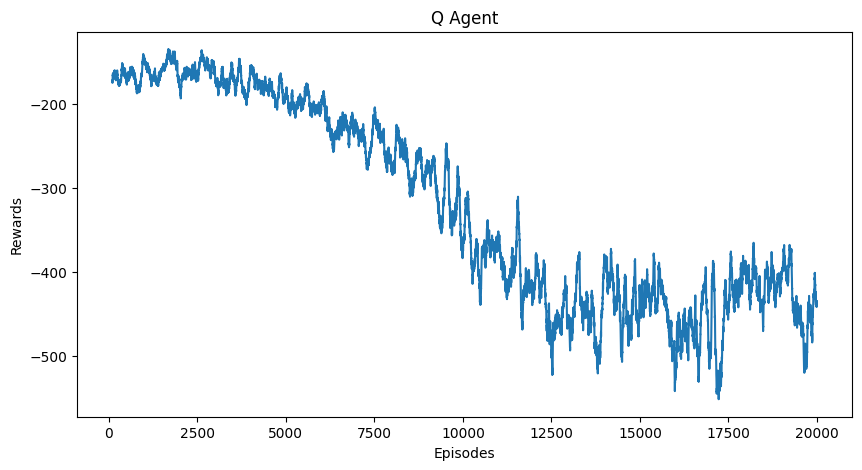

In [29]:
plot_rewards(rewards_q, title="Q Agent", sma=100)

In [30]:
video_dir = Path('./gym_videos')
video_dir.mkdir(parents=True, exist_ok=True)

env = gym.make(env_name, render_mode='rgb_array')
env = gym.wrappers.RecordVideo(
    env,
    video_folder=video_dir,
    name_prefix=env_name,
)
env = DiscretizeObservationWrapper(env, n_bins)

In [31]:
frames, rewards = play(agent, env, 1)

  0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
for i, episode_frames in enumerate(frames):
    filename = f"{video_dir}/{env_name}_{i}.mp4"
    clip = ImageSequenceClip(episode_frames, fps=60)
    clip.write_videofile(filename, codec='libx264')
    
    print(f"Episode {i} reward: {rewards[i]:.2f}")    
    
env.close()

MoviePy - Building video gym_videos/LunarLander-v3_0.mp4.
MoviePy - Writing video gym_videos/LunarLander-v3_0.mp4



MoviePy - Done !
MoviePy - video ready gym_videos/LunarLander-v3_0.mp4
Episode 0 reward: -399.87


In [33]:
videos = [ x for x in list(video_dir.glob('*.mp4')) if env_name in x.name]

for video in videos:
    print(video)
    display(Video(video))

gym_videos/LunarLander-v3_0.mp4


gym_videos/LunarLander-v3-episode-27.mp4


gym_videos/LunarLander-v3-episode-8.mp4


gym_videos/LunarLander-v3-episode-1.mp4


gym_videos/LunarLander-v3-episode-0.mp4
